# 第6回目の着順予想
- 21/04/11に作成開始
- 過去レースから算出した、各枠からの1-3着率を特徴量に追加
- 過去レースから算出した、その枠からの平均start timeを特徴量に追加

このnotebookでやったこと
- optunaを利用してハイパーパラメータの最適化

In [1]:
import pandas as pd

## 1. データ準備
### 1.1 データロード

In [2]:
race_df = pd.read_pickle('../../../data/arrangedData/race_df_w_stocastic_3.pkl').reset_index(drop=True)
# 中身を確認
race_df

,date,venue,raceNumber,枠,racer_id,racer_class,racer_name,num_false_start,num_late_start,motorNo,...,exhibition_flying,exhibition_late,exhibition_st,weather_曇り,weather_雨,weather_雪,1着率,2着率,3着率,average_start_time
0,2020-10-01,三 国,1.0,1,4961,2,西橋 奈未,1,0,34,...,False,False,0.07,0,0,0,NaN,NaN,NaN,NaN
1,2020-10-01,三 国,1.0,2,4071,3,古賀 千晶,1,0,52,...,False,False,0.21,0,0,0,NaN,NaN,NaN,NaN
2,2020-10-01,三 国,1.0,3,4849,4,森田 太陽,0,0,26,...,False,False,0.30,0,0,0,NaN,NaN,NaN,NaN
3,2020-10-01,三 国,1.0,4,4746,3,大豆生田 蒼,0,0,53,...,False,False,0.24,0,0,0,NaN,NaN,NaN,NaN
4,2020-10-01,三 国,1.0,5,4987,3,島倉 都,0,0,35,...,False,False,0.19,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158977,2021-04-10,蒲 郡,12.0,2,4066,2,東本 勝利,0,0,20,...,False,False,0.04,0,0,0,0.117647,0.352941,0.176471,0.161176
158978,2021-04-10,蒲 郡,12.0,3,4611,2,今井 美亜,0,0,68,...,True,False,0.06,0,0,0,0.190476,0.142857,0.142857,0.147143
158979,2021-04-10,蒲 郡,12.0,4,3761,2,山本 光雄,0,0,27,...,True,False,0.01,0,0,0,0.052632,0.210526,0.157895,0.170526
158980,2021-04-10,蒲 郡,12.0,5,3994,2,茶谷 桜,0,0,52,...,False,False,0.02,0,0,0,0.000000,0.000000,0.176471,0.181765


### 1.2 過去レースが意味のある部分（dfの後ろの方だけ）を使う

In [3]:
race_df = race_df[race_df["date"] > "2021-03-15"]
race_df

,date,venue,raceNumber,枠,racer_id,racer_class,racer_name,num_false_start,num_late_start,motorNo,...,exhibition_flying,exhibition_late,exhibition_st,weather_曇り,weather_雨,weather_雪,1着率,2着率,3着率,average_start_time
136464,2021-03-16,びわこ,1.0,1,4233,2,亀山 雅幸,0,0,29,...,False,False,0.13,1,0,0,0.363636,0.454545,0.045455,0.164091
136465,2021-03-16,びわこ,1.0,2,4438,3,森作 雄大,1,0,65,...,True,False,0.02,1,0,0,0.055556,0.277778,0.111111,0.142778
136466,2021-03-16,びわこ,1.0,3,4458,3,抹香 雄三,0,0,31,...,True,False,0.03,1,0,0,0.120000,0.040000,0.200000,0.168000
136467,2021-03-16,びわこ,1.0,4,3401,3,上田 隆章,0,0,32,...,False,False,0.19,1,0,0,0.052632,0.263158,0.105263,0.187895
136468,2021-03-16,びわこ,1.0,5,3459,3,中野 和裕,0,0,23,...,False,False,0.06,1,0,0,0.000000,0.200000,0.133333,0.178667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158977,2021-04-10,蒲 郡,12.0,2,4066,2,東本 勝利,0,0,20,...,False,False,0.04,0,0,0,0.117647,0.352941,0.176471,0.161176
158978,2021-04-10,蒲 郡,12.0,3,4611,2,今井 美亜,0,0,68,...,True,False,0.06,0,0,0,0.190476,0.142857,0.142857,0.147143
158979,2021-04-10,蒲 郡,12.0,4,3761,2,山本 光雄,0,0,27,...,True,False,0.01,0,0,0,0.052632,0.210526,0.157895,0.170526
158980,2021-04-10,蒲 郡,12.0,5,3994,2,茶谷 桜,0,0,52,...,False,False,0.02,0,0,0,0.000000,0.000000,0.176471,0.181765


### 1.3 1-6枠のデータを1行にまとめ, inputにできない列を一部削除

In [4]:
# レースごとに一つの情報しか持たない列と、枠番ごとに異なる情報をもつ列を分けて別のdfとする(date, venue, racenumberはindex的に用いる)
race_df_frame = race_df[['date', 'venue', 'raceNumber', '枠', 'num_false_start', 'num_late_start',
       'racer_class', 'ボート2連率', 'ボート3連率', 'モーター2連率', 'モーター3連率',
       'exhibitionTime', 'exhibition_st', 'exhibition_cource', 'exhibition_flying',
       'exhibition_late', 'tilt', 'weight', '1着率', '2着率', '3着率', '着順', "average_start_time"
                       ]].set_index(['date', 'venue', 'raceNumber'])

race_df_race = race_df[['date', 'venue', 'raceNumber',
       'temperature', 'water_temperature', 'wave_height',
                       'wind_speed', 'weather_曇り', 'weather_雨', 'weather_雪',
                      ]]
race_df_race.drop_duplicates(inplace=True)
race_df_race.set_index(['date', 'venue', 'raceNumber'], inplace=True)

# 枠番ごとに異なる情報をもつ列について、枠番ごとのdfに分類した後で行方向にconcat
race_df_frame_list = []
for frame in range(1, 7):
    # 枠番を列名の末尾に付与
    race_df_frame_ = race_df_frame[race_df_frame["枠"]==frame].add_suffix("_{0}".format(frame))
    race_df_frame_list.append(race_df_frame_)

race_df_merged = pd.concat(race_df_frame_list, axis=1)

# レースごとに一つの情報しか持たない列をマージ
race_df_merged = pd.concat([race_df_merged, race_df_race], axis=1)
race_df_merged

<ipython-input-4-778c17c96f14>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df_race.drop_duplicates(inplace=True)


枠_1  num_false_start_1  num_late_start_1  \
date       venue raceNumber                                             
2021-03-16 びわこ   1.0           1                  0                 0   
                 2.0           1                  0                 0   
                 3.0           1                  0                 0   
                 4.0           1                  1                 0   
                 5.0           1                  0                 0   
...                          ...                ...               ...   
2021-04-10 蒲　郡   8.0           1                  0                 0   
                 9.0           1                  0                 0   
                 10.0          1                  0                 0   
                 11.0          1                  1                 0   
                 12.0          1                  1                 0   

                             racer_class_1  ボート2連率_1  ボート3連率_1  モーター2連率_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0                     2     38.27     53.70      39.52   
                 2.0                     2     29.01     43.83      30.61   
                 3.0                     2     37.78     53.89      23.97   
                 4.0                     3     32.52     51.53      30.00   
                 5.0                     2     35.36     49.72      36.48   
...                                    ...       ...       ...        ...   
2021-04-10 蒲　郡   8.0                     2     29.38     49.48      31.03   
                 9.0                     1     28.74     41.38      38.46   
                 10.0                    2     32.31     49.34      29.47   
                 11.0                    1     34.78     48.31      36.41   
                 12.0                    1     29.41     48.24      35.68   

                             モーター3連率_1  exhibitionTime_1  exhibition_st_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0             53.81              6.74             0.13   
                 2.0             47.96              6.62             0.16   
                 3.0             44.52              6.70             0.25   
                 4.0             46.00              6.61             0.37   
                 5.0             47.80              6.66             0.14   
...                                ...               ...              ...   
2021-04-10 蒲　郡   8.0             50.00              6.70             0.02   
                 9.0             54.95              6.71             0.01   
                 10.0            46.86              6.75             0.01   
                 11.0            55.90              6.75             0.18   
                 12.0            53.52              6.76             0.09   

                             ...     3着率_6  着順_6  average_start_time_6  \
date       venue raceNumber  ...                                         
2021-03-16 びわこ   1.0         ...  0.026316     6              0.201053   
                 2.0         ...  0.105263     6              0.230000   
                 3.0         ...  0.000000     4              0.160000   
                 4.0         ...  0.083333     6              0.194167   
                 5.0         ...  0.142857     4              0.184286   
...                          ...       ...   ...                   ...   
2021-04-10 蒲　郡   8.0         ...  0.100000     4              0.170000   
                 9.0         ...  0.166667     4              0.170833   
                 10.0        ...  0.095238     6              0.165238   
                 11.0        ...  0.071429     6              0.183571   
                 12.0        ...  0.160000     5              0.186800   

                             temperature  water_temperature  wave_height  \
date       venue raceNumber         

### 1.5 統計量の列がNanを含む場合その行を削除

In [5]:
race_df_merged = race_df_merged[~race_df_merged.isnull().any(axis=1)]

"""
for column in race_df_merged.columns:
    df_column = race_df_merged[column]
    print("{0}   {1}".format(column, df_column.isnull().any()))
"""
race_df_merged

枠_1  num_false_start_1  num_late_start_1  \
date       venue raceNumber                                             
2021-03-16 びわこ   1.0           1                  0                 0   
                 2.0           1                  0                 0   
                 3.0           1                  0                 0   
                 4.0           1                  1                 0   
                 5.0           1                  0                 0   
...                          ...                ...               ...   
2021-04-10 蒲　郡   8.0           1                  0                 0   
                 9.0           1                  0                 0   
                 10.0          1                  0                 0   
                 11.0          1                  1                 0   
                 12.0          1                  1                 0   

                             racer_class_1  ボート2連率_1  ボート3連率_1  モーター2連率_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0                     2     38.27     53.70      39.52   
                 2.0                     2     29.01     43.83      30.61   
                 3.0                     2     37.78     53.89      23.97   
                 4.0                     3     32.52     51.53      30.00   
                 5.0                     2     35.36     49.72      36.48   
...                                    ...       ...       ...        ...   
2021-04-10 蒲　郡   8.0                     2     29.38     49.48      31.03   
                 9.0                     1     28.74     41.38      38.46   
                 10.0                    2     32.31     49.34      29.47   
                 11.0                    1     34.78     48.31      36.41   
                 12.0                    1     29.41     48.24      35.68   

                             モーター3連率_1  exhibitionTime_1  exhibition_st_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0             53.81              6.74             0.13   
                 2.0             47.96              6.62             0.16   
                 3.0             44.52              6.70             0.25   
                 4.0             46.00              6.61             0.37   
                 5.0             47.80              6.66             0.14   
...                                ...               ...              ...   
2021-04-10 蒲　郡   8.0             50.00              6.70             0.02   
                 9.0             54.95              6.71             0.01   
                 10.0            46.86              6.75             0.01   
                 11.0            55.90              6.75             0.18   
                 12.0            53.52              6.76             0.09   

                             ...     3着率_6  着順_6  average_start_time_6  \
date       venue raceNumber  ...                                         
2021-03-16 びわこ   1.0         ...  0.026316     6              0.201053   
                 2.0         ...  0.105263     6              0.230000   
                 3.0         ...  0.000000     4              0.160000   
                 4.0         ...  0.083333     6              0.194167   
                 5.0         ...  0.142857     4              0.184286   
...                          ...       ...   ...                   ...   
2021-04-10 蒲　郡   8.0         ...  0.100000     4              0.170000   
                 9.0         ...  0.166667     4              0.170833   
                 10.0        ...  0.095238     6              0.165238   
                 11.0        ...  0.071429     6              0.183571   
                 12.0        ...  0.160000     5              0.186800   

                             temperature  water_temperature  wave_height  \
date       venue raceNumber         

### 1.4 rank列を作成し、inputにできない列を削除
- 1枠： 1着ならば1, そうでなければ0

In [6]:
# 1枠は1着ならば1, そうでなければ0
race_df_merged.loc[race_df_merged["着順_1"] == 1, "rank_1"] = 1
race_df_merged.loc[race_df_merged["着順_1"] > 1, "rank_1"] = 0

race_df_merged.reset_index(inplace=True)

# inputにできない列を削除
drop_columns = ["着順_{0}".format(i) for i in range(1, 7)] + ["枠_{0}".format(i) for i in range(1, 7)] + ["date", "venue", "raceNumber"]
race_df_merged_for_analyze = race_df_merged.drop(drop_columns, axis=1)

/Users/grice/opt/anaconda3/envs/boatrace2/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/grice/opt/anaconda3/envs/boatrace2/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/grice/opt/anaconda3/envs/boatrace2/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is 

In [7]:
race_df_merged

,date,venue,raceNumber,枠_1,num_false_start_1,num_late_start_1,racer_class_1,ボート2連率_1,ボート3連率_1,モーター2連率_1,...,着順_6,average_start_time_6,temperature,water_temperature,wave_height,wind_speed,weather_曇り,weather_雨,weather_雪,rank_1
0,2021-03-16,びわこ,1.0,1,0,0,2,38.27,53.70,39.52,...,6,0.201053,10.0,12.0,7,3,1,0,0,1.0
1,2021-03-16,びわこ,2.0,1,0,0,2,29.01,43.83,30.61,...,6,0.230000,14.0,12.0,2,2,0,0,0,1.0
2,2021-03-16,びわこ,3.0,1,0,0,2,37.78,53.89,23.97,...,4,0.160000,14.0,12.0,2,4,0,0,0,0.0
3,2021-03-16,びわこ,4.0,1,1,0,3,32.52,51.53,30.00,...,6,0.194167,14.0,12.0,2,2,0,1,0,1.0
4,2021-03-16,びわこ,5.0,1,0,0,2,35.36,49.72,36.48,...,4,0.184286,15.0,12.0,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,2021-04-10,蒲 郡,8.0,1,0,0,2,29.38,49.48,31.03,...,4,0.170000,14.0,19.0,1,3,0,0,0,0.0
3740,2021-04-10,蒲 郡,9.0,1,0,0,1,28.74,41.38,38.46,...,4,0.170833,13.0,19.0,1,2,0,0,0,1.0
3741,2021-04-10,蒲 郡,10.0,1,0,0,2,32.31,49.34,29.47,...,6,0.165238,13.0,19.0,1,2,0,0,0,1.0
3742,2021-04-10,蒲 郡,11.0,1,1,0,1,34.78,48.31,36.41,...,6,0.183571,13.0,19.0,1,2,0,0,0,1.0


In [8]:
race_df_merged_for_analyze

,num_false_start_1,num_late_start_1,racer_class_1,ボート2連率_1,ボート3連率_1,モーター2連率_1,モーター3連率_1,exhibitionTime_1,exhibition_st_1,exhibition_cource_1,...,3着率_6,average_start_time_6,temperature,water_temperature,wave_height,wind_speed,weather_曇り,weather_雨,weather_雪,rank_1
0,0,0,2,38.27,53.70,39.52,53.81,6.74,0.13,1.0,...,0.026316,0.201053,10.0,12.0,7,3,1,0,0,1.0
1,0,0,2,29.01,43.83,30.61,47.96,6.62,0.16,1.0,...,0.105263,0.230000,14.0,12.0,2,2,0,0,0,1.0
2,0,0,2,37.78,53.89,23.97,44.52,6.70,0.25,1.0,...,0.000000,0.160000,14.0,12.0,2,4,0,0,0,0.0
3,1,0,3,32.52,51.53,30.00,46.00,6.61,0.37,1.0,...,0.083333,0.194167,14.0,12.0,2,2,0,1,0,1.0
4,0,0,2,35.36,49.72,36.48,47.80,6.66,0.14,1.0,...,0.142857,0.184286,15.0,12.0,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,0,0,2,29.38,49.48,31.03,50.00,6.70,0.02,1.0,...,0.100000,0.170000,14.0,19.0,1,3,0,0,0,0.0
3740,0,0,1,28.74,41.38,38.46,54.95,6.71,0.01,1.0,...,0.166667,0.170833,13.0,19.0,1,2,0,0,0,1.0
3741,0,0,2,32.31,49.34,29.47,46.86,6.75,0.01,1.0,...,0.095238,0.165238,13.0,19.0,1,2,0,0,0,1.0
3742,1,0,1,34.78,48.31,36.41,55.90,6.75,0.18,1.0,...,0.071429,0.183571,13.0,19.0,1,2,0,0,0,1.0


### 1.6 training dataとtest dataに分ける

In [9]:
from sklearn.model_selection import train_test_split

X = race_df_merged_for_analyze.drop("rank_1", axis=1)
y = race_df_merged_for_analyze["rank_1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle=False, test_size=0.3)

In [10]:
print(len(X_train))
print(len(X_valid))
print(len(X_test))

2396
599
749


### 2.3 optuna + 勾配ブースティング木

In [11]:
import optuna.integration.lightgbm as lgb_o
lgb_train = lgb_o.Dataset(X_train, y_train)
lgb_valid = lgb_o.Dataset(X_valid, y_valid)

params = {
    "objective": "binary",
    "random_state": 100
}

lgb_clf_o = lgb_o.train(params, lgb_train,
                        valid_sets=(lgb_train, lgb_valid),
                        verbose_eval=100,
                        early_stopping_rounds=10
                       )

[I 2021-05-07 20:30:04,666] A new study created in memory with name: no-name-a7d1bb4c-c432-4a3c-91d2-175d0b38727a
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.643485:  29%|##8       | 2/7 [00:00<00:01,  4.39it/s]

Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.390176	valid_1's binary_logloss: 0.643485
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.503475	valid_1's binary_logloss: 0.650784
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

feature_fraction, val_score: 0.635210:  57%|#####7    | 4/7 [00:01<00:00,  3.90it/s]

Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.482446	valid_1's binary_logloss: 0.640566
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.380848	valid_1's binary_logloss: 0.63521
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005077 seconds.
You can set `force_col_wise=true` to remove the ov

feature_fraction, val_score: 0.635210:  86%|########5 | 6/7 [00:01<00:00,  4.16it/s]

Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.400334	valid_1's binary_logloss: 0.643252
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.467745	valid_1's binary_logloss: 0.643178
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004727 seconds.
You can set `force_col_wise=true` to remove the o

num_leaves, val_score: 0.635210:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.444215	valid_1's binary_logloss: 0.641186
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

num_leaves, val_score: 0.635210:   5%|5         | 1/20 [00:00<00:06,  3.10it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.336476	valid_1's binary_logloss:

num_leaves, val_score: 0.635210:  10%|#         | 2/20 [00:00<00:04,  3.70it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

num_leaves, val_score: 0.635210:  15%|#5        | 3/20 [00:00<00:03,  4.49it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.466323	valid_1's binary_logloss: 0.64152
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain

num_leaves, val_score: 0.635210:  20%|##        | 4/20 [00:01<00:04,  3.84it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

num_leaves, val_score: 0.635210:  25%|##5       | 5/20 [00:01<00:04,  3.36it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

num_leaves, val_score: 0.635210:  30%|###       | 6/20 [00:01<00:04,  3.02it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.336476	valid_1's binary_logloss:

num_leaves, val_score: 0.635210:  35%|###5      | 7/20 [00:02<00:03,  3.34it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

num_leaves, val_score: 0.635210:  40%|####      | 8/20 [00:02<00:03,  3.09it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.336476	valid_1's binary_logloss: 0.655718
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919

num_leaves, val_score: 0.635210:  45%|####5     | 9/20 [00:02<00:03,  3.16it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iter

num_leaves, val_score: 0.635210:  55%|#####5    | 11/20 [00:03<00:02,  3.88it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.336476	valid_1's binary_logloss:

num_leaves, val_score: 0.635210:  60%|######    | 12/20 [00:03<00:01,  4.28it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.576451	valid_1's binary_logloss: 0.636581
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[L

num_leaves, val_score: 0.635210:  65%|######5   | 13/20 [00:03<00:01,  4.79it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.576451	valid_1's binary_logloss: 0.636581
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.635210:  70%|#######   | 14/20 [00:03<00:01,  4.79it/s]

Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.33478	valid_1's binary_logloss: 0.653405
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.635210:  75%|#######5  | 15/20 [00:03<00:01,  4.23it/s]

Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.337496	valid_1's binary_logloss: 0.649616
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.635210:  85%|########5 | 17/20 [00:04<00:00,  4.18it/s]

Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.171281	valid_1's binary_logloss: 0.651029
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.576451	valid_1's binary_logloss: 0.636581
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001909 seconds.
You can set `force_col_wise=true` to remove the o

num_leaves, val_score: 0.635210:  90%|######### | 18/20 [00:04<00:00,  4.20it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.356542	valid_1's binary_logloss: 0.637607
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015


num_leaves, val_score: 0.635210:  95%|#########5| 19/20 [00:05<00:00,  4.12it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.35333	valid_1's binary_logloss: 0.652187


bagging, val_score: 0.632986:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.599856	valid_1's binary_logloss: 0.632986
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, nu

bagging, val_score: 0.629023:  10%|#         | 1/10 [00:00<00:01,  6.84it/s]

Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.576117	valid_1's binary_logloss: 0.629023
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.629023:  30%|###       | 3/10 [00:00<00:01,  6.26it/s]

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.5665	valid_1's binary_logloss: 0.630222
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.578277	valid_1's binary_logloss: 0.634091
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_col_wise=true` to remove the ove

bagging, val_score: 0.629023:  40%|####      | 4/10 [00:00<00:00,  6.69it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.607492	valid_1's binary_logloss: 0.639371
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.629023:  60%|######    | 6/10 [00:00<00:00,  6.64it/s]

Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.58615	valid_1's binary_logloss: 0.635207
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.589924	valid_1's binary_logloss: 0.636096
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001792 seconds.
You can set `force_col_wise=true` to remove the ov

bagging, val_score: 0.629023:  80%|########  | 8/10 [00:01<00:00,  7.17it/s]

[binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.608399	valid_1's binary_logloss: 0.639644
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.607477	valid_1's binary_logloss: 0.634109


bagging, val_score: 0.629023:  90%|######### | 9/10 [00:01<00:00,  6.48it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.602126	valid_1's binary_logloss: 0.633636
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[L

feature_fraction_stage2, val_score: 0.629023:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.592183	valid_1's binary_logloss: 0.632692
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.628918:  33%|###3      | 2/6 [00:00<00:00,  5.75it/s]

Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.587448	valid_1's binary_logloss: 0.628918
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.583086	valid_1's binary_logloss: 0.631262


feature_fraction_stage2, val_score: 0.628918:  50%|#####     | 3/6 [00:00<00:00,  6.31it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.576117	valid_1's binary_logloss: 0.629023
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[L

feature_fraction_stage2, val_score: 0.628918:  83%|########3 | 5/6 [00:00<00:00,  7.13it/s]

Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.581335	valid_1's binary_logloss: 0.631262
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.577203	valid_1's binary_logloss: 0.629532
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_row_wise=true` to remove the o

regularization_factors, val_score: 0.627769:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.577843	valid_1's binary_logloss: 0.627769
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.627768:  10%|#         | 2/20 [00:00<00:02,  6.85it/s]

Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.57902	valid_1's binary_logloss: 0.631377
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.577851	valid_1's binary_logloss: 0.627768
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

regularization_factors, val_score: 0.627768:  15%|#5        | 3/20 [00:00<00:02,  6.52it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.57928	valid_1's binary_logloss: 0.62924
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.59192	valid_

regularization_factors, val_score: 0.627768:  25%|##5       | 5/20 [00:00<00:02,  6.13it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.577843	valid_1's binary_logloss: 0.627769
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[L

regularization_factors, val_score: 0.627768:  30%|###       | 6/20 [00:00<00:02,  5.68it/s]


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.577846	valid_1's binary_logloss: 0.627769
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015


regularization_factors, val_score: 0.627768:  35%|###5      | 7/20 [00:01<00:02,  5.18it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.577843	valid_1's binary_logloss: 0.627769


regularization_factors, val_score: 0.627768:  40%|####      | 8/20 [00:01<00:02,  5.05it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.593309	valid_1's binary_logloss: 0.62803


regularization_factors, val_score: 0.626984:  45%|####5     | 9/20 [00:01<00:02,  5.43it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.585073	valid_1's binary_logloss: 0.626984
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

regularization_factors, val_score: 0.626984:  50%|#####     | 10/20 [00:01<00:01,  5.40it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.577847	valid_1's binary_logloss: 0.627768
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.626984:  60%|######    | 12/20 [00:02<00:01,  6.18it/s]

Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.593667	valid_1's binary_logloss: 0.62972
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.60588	valid_1's binary_logloss: 0.630818
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000

regularization_factors, val_score: 0.626984:  70%|#######   | 14/20 [00:02<00:00,  6.67it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.605823	valid_1's binary_logloss: 0.630809
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.588506	valid_1's binary_logloss: 0.627238


regularization_factors, val_score: 0.625441:  75%|#######5  | 15/20 [00:02<00:00,  6.68it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.580005	valid_1's binary_logloss: 0.625441
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[L

regularization_factors, val_score: 0.625441:  85%|########5 | 17/20 [00:02<00:00,  6.44it/s]

Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.590867	valid_1's binary_logloss: 0.627065
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.579752	valid_1's binary_logloss: 0.627492


regularization_factors, val_score: 0.625441:  90%|######### | 18/20 [00:02<00:00,  6.45it/s]

[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.578806	valid_1's binary_logloss: 0.627555
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

min_data_in_leaf, val_score: 0.625441:   0%|          | 0/5 [00:00<?, ?it/s]

Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.577843	valid_1's binary_logloss: 0.627769
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.605855	valid_1's binary_logloss: 0.630821
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002215 seconds.
You can set `force_row_wise=true` to remove the o

min_data_in_leaf, val_score: 0.625441:  20%|##        | 1/5 [00:00<00:00,  4.84it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.579023	valid_1's binary_logloss: 0.626836
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919

min_data_in_leaf, val_score: 0.625441:  40%|####      | 2/5 [00:00<00:00,  5.62it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.590328	valid_1's binary_logloss: 0.627927
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds


min_data_in_leaf, val_score: 0.625441:  80%|########  | 4/5 [00:00<00:00,  6.19it/s]

Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.580005	valid_1's binary_logloss: 0.625441
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10802
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.580005	valid_1's binary_logloss: 0.625441
[LightGBM] [Info] Number of positive: 1381, number of negative: 1015
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the o

min_data_in_leaf, val_score: 0.625441: 100%|##########| 5/5 [00:00<00:00,  5.79it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576377 -> initscore=0.307919
[LightGBM] [Info] Start training from score 0.307919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.580005	valid_1's binary_logloss: 0.625441


In [12]:
lgb_clf_o.params

{'objective': 'binary',
 'random_state': 100,
 'feature_pre_filter': False,
 'lambda_l1': 0.01376862458541511,
 'lambda_l2': 6.959541464779171,
 'num_leaves': 5,
 'feature_fraction': 0.552,
 'bagging_fraction': 0.6909700062980629,
 'bagging_freq': 2,
 'min_child_samples': 20,
 'num_iterations': 1000,
 'early_stopping_round': 10}

In [23]:
import lightgbm as lgb
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

params = {'objective': 'binary',
 'random_state': 100,
 'feature_pre_filter': False,
 'lambda_l1': 0.01376862458541511,
 'lambda_l2': 6.959541464779171,
 'num_leaves': 5,
 'feature_fraction': 0.552,
 'bagging_fraction': 0.6909700062980629,
 'bagging_freq': 2,
 'min_child_samples': 20
         }

model_lgb = lgb.LGBMClassifier(**params)
model_lgb.fit(X_train, y_train)

print('auc_train = ', roc_auc_score(y_true=y_train, y_score=model_lgb.predict_proba(X_train)[:, 1]))
print('auc_valid = ', roc_auc_score(y_true=y_valid, y_score=model_lgb.predict_proba(X_valid)[:, 1]))
print('auc_test = ', roc_auc_score(y_true=y_test, y_score=model_lgb.predict_proba(X_test)[:, 1]))

y_pred_lgb = model_lgb.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_lgb))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_lgb))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_lgb))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_lgb))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_lgb))

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.552
[LightGBM] [Warning] bagging_fraction is set=0.6909700062980629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6909700062980629
[LightGBM] [Warning] lambda_l2 is set=6.959541464779171, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.959541464779171
[LightGBM] [Warning] lambda_l1 is set=0.01376862458541511, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01376862458541511
auc_train =  0.8225616476958583
auc_valid =  0.7047844196780367
auc_test =  0.6686820890290921
confusion matrix = 
 [[138 179]
 [ 92 340]]
accuracy =  0.6381842456608812
precision =  0.6551059730250481
recall =  0.7870370370370371
f1 score =  0.7150368033648791


#### 回帰係数的な

In [19]:
pd.DataFrame({"features": X_train.columns, "importance": model_lgb.feature_importances_}).sort_values("importance", ascending=False)

,features,importance
14,1着率_1,23
2,racer_class_1,18
3,ボート2連率_1,11
93,ボート2連率_6,11
71,average_start_time_4,10
...,...,...
84,tilt_5,0
83,exhibition_late_5,0
82,exhibition_flying_5,0
66,tilt_4,0


#### 学習曲線

In [20]:
import numpy as np
from sklearn.model_selection import learning_curve

# サンプル数300刻みで検証する
train_sizes = np.arange(300, len(X_train), 300)

train_sizes, train_scores, test_scores = learning_curve(
    model_lgb, X, y, train_sizes=train_sizes, random_state=100, shuffle=False
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.552
[LightGBM] [Warning] bagging_fraction is set=0.6909700062980629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6909700062980629
[LightGBM] [Warning] lambda_l2 is set=6.959541464779171, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.959541464779171
[LightGBM] [Warning] lambda_l1 is set=0.01376862458541511, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01376862458541511
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.552
[LightGBM] [Warning] bagging_fraction is set=0.6909700062980629, subsample=1.0 will be ignored. Current value: bag

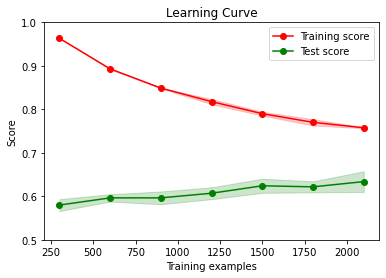

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

# Traing score と Test score をプロット
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

# 標準偏差の範囲を色付け
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.2)

plt.ylim(0.5, 1)
plt.legend(loc="best")

plt.show()

## 3. 回収率計算に用いるため、Light GBMの予測結果をdfにして出力

In [22]:
# 3.1 merged_dfをトレーニングデータ・テストデータと同じようにsplitし、indexを作成する
for_index_df = train_test_split(race_df_merged, shuffle=False, test_size=0.3)
output_df_train = for_index_df[0][["date", "venue", "raceNumber"]]
output_df_test = for_index_df[1][["date", "venue", "raceNumber"]]

# 3.2 Light GBMの予測結果をそれぞれ格納
output_df_train["predict_proba_frame_1"] = model_lgb.predict_proba(X_train)[:, 1]
output_df_test["predict_proba_frame_1"] = model_lgb.predict_proba(X_test)[:, 1]

ValueError: Length of values (2396) does not match length of index (2620)

In [ ]:
# 確認用
output_df_train

In [ ]:
# 3.3 pickleファイルにして出力
output_df_train.to_pickle('predict_proba_train_frame_1.pkl')
output_df_test.to_pickle('predict_proba_test_frame_1.pkl')